# Data Exploration 02

You're working as a data analyst at a cereal marketing company in New York.

In a strategy meeting, the marketing director tells you that in 2018, the US weight loss industry was worth over $72 Billion dollars, growing 4% compared to the previous year.

In contrast, sales of cold cereal fell 6% to $8.5 billion during the same time period.

Cereal executives have approached the marketing company asking how they can somehow tap into the weight loss market growth to boost the sales of their cereal brands.

Your assignment is to analyze a dataset of nutritional information for major US cereals, and calculate some metrics that can be used by the marketing team.

## Part 1: Import Pandas and load the data

Remember to import Pandas the conventional way. If you've forgotten how, you may want to review [Data Exploration 01](https://byui-cse.github.io/cse450-course/module-01/exploration-01.html).

The dataset for this exploration is stored at the following url:

[https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/cereal.csv](https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/cereal.csv)

There are lots of ways to load data into your workspace. The easiest way in this case is to [ask Pandas to do it for you](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column?
* Do any of the columns have missing values?

In [1]:
# Part 1: Enter your code below to import Pandas according to the
# conventional method. Then load the dataset into a Pandas dataframe.

# Write any code needed to explore the data by seeing what the first few
# rows look like. Then display a technical summary of the data to determine
# the data types of each column, and which columns have missing data.

# import pandas
import pandas as pd

# load the data
file = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/cereal.csv'

cereal_data = pd.read_csv(file)

# show first five rows
cereal_data.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [2]:
# show quick summary of the cereal data

cereal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


## Part 2: Calculate Summary Statistics

The marketing team has determined that when choosing a cereal, consumers are most interested in `calories`, `sugar`, `fiber`, `fat`, and `protein`.

First, let's calcuate some summary statistics for these categories across the entire dataset. We're particularly intrested in the mean, median, standard deviation, min, and max values.

There are [multiple ways to accomplish this](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html).

In [3]:
# Part 2: Enter your code below to calculate summary statistics for the
# calories, sugars, fiber, fat, and protein features.

cereal_data[['calories', 'sugars', 'fiber', 'fat', 'protein']].describe()

,calories,sugars,fiber,fat,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,6.922078,2.151948,1.012987,2.545455
std,19.484119,4.444885,2.383364,1.006473,1.094790
min,50.000000,-1.000000,0.000000,0.000000,1.000000
25%,100.000000,3.000000,1.000000,0.000000,2.000000
50%,110.000000,7.000000,2.000000,1.000000,3.000000
75%,110.000000,11.000000,3.000000,2.000000,3.000000
max,160.000000,15.000000,14.000000,5.000000,6.000000


## Part 3: Transform Data

To make analysis easier, you want to convert the manufacturer codes used in the dataset to the manufacturer names.

First, display the count of each manufacturer code value used in the dataset (found in the `mfr` column).

Then, [create a new column with the appropriate manufacturer name for each entry](https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html), using this mapping:

    A = American Home Food Products
    G = General Mills
    K = Kelloggs
    N = Nabisco
    P = Post
    Q = Quaker Oats
    R = Ralston Purina

> Note: While the tutorial linked above uses the [`replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) function, using the [`map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function instead can often be much faster and more memory efficient, especially for large datasets.

In [4]:
# Display the count of values for the manufacturer code ("mfr" column), then
# create a new column containing the appropriate manufacturer names.

cereal_data['mfr_name'] = cereal_data['mfr'].map({
  'A': 'American Home Food Products',
  'G': 'General Mills',
  'K': 'Kelloggs',
  'N': 'Nabisco',
  'P': 'Post',
  'Q': 'Quaker Oats',
  'R': 'Ralston Purina'
})

# If we missed any mappings, they will show up as a NaN value (Not a Number), 
# so we'll do a quick value_counts on our new column to check
cereal_data['mfr_name'].value_counts()

mfr_name
Kelloggs                       23
General Mills                  22
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Nabisco                         6
American Home Food Products     1
Name: count, dtype: int64

## Part 4: Visualization

Let's do some more data exploration visually.

Import your visualization library of choice and set any needed configuration options.

In [5]:
# Import your visualization library

import altair as alt

### Sugar Distribution

Marketing tells us that their surveys have revealed that sugar content is the number one concern of consumers when choosing cereal.

They would like to see the following visualizations:

*  A histogram plot of the sugar content in all cereals.

* A scatter plot showing the relationship between sugar and calories.

* A box plot showing the distribution of sugar content by manufacturer.

In [6]:
# Create the three visualzations requested by the the marketing team
# A histogram plot of the sugar content in all cereals.
histo = alt.Chart(cereal_data).mark_bar().encode(
  alt.X('sugars', bin=True, title='Sugar (g)'),
  alt.Y('count()', title='Number of Cereal Brands'),
  tooltip=['sugars', 'count()']
).properties(
  width=600,
  height=400,
  title='Breakfast Cereal Sugar Distribution'
)

histo


alt.Chart(...)

In [7]:
# A scatter plot showing the relationship between sugar and calories.
scatter = alt.Chart(cereal_data).mark_circle(
  size = 100
).encode(
  alt.X('calories', title='Calories (kcal)'),
  alt.Y('sugars', title='Sugar (g)'),
  alt.Size('fat', legend=alt.Legend(title='Fat (g)')),
  tooltip=('name')
).properties(
  width=600,
  height=400,
  title='Sugar vs Calories'
)

scatter

alt.Chart(...)

In [8]:
# A box plot showing the distribution of sugar content by manufacturer.
box = alt.Chart(cereal_data).mark_boxplot(
  size=50
).encode(
  alt.X('mfr_name', title=None),
  alt.Y('sugars', title='Sugar (g)'),
  alt.Color('mfr_name', legend=alt.Legend(title='Manufacturer')),
  tooltip=('name')
).properties(
  width=600,
  height=400,
  title='Sugar Distribution by Manufacturer'
)

box

alt.Chart(...)

In [9]:
# By saving each of the above charts as variables, we can easily display them side by side,
# adjusting sizes as needed. 

(histo | scatter) & box.properties(width=1200)

alt.VConcatChart(...)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('ticks')

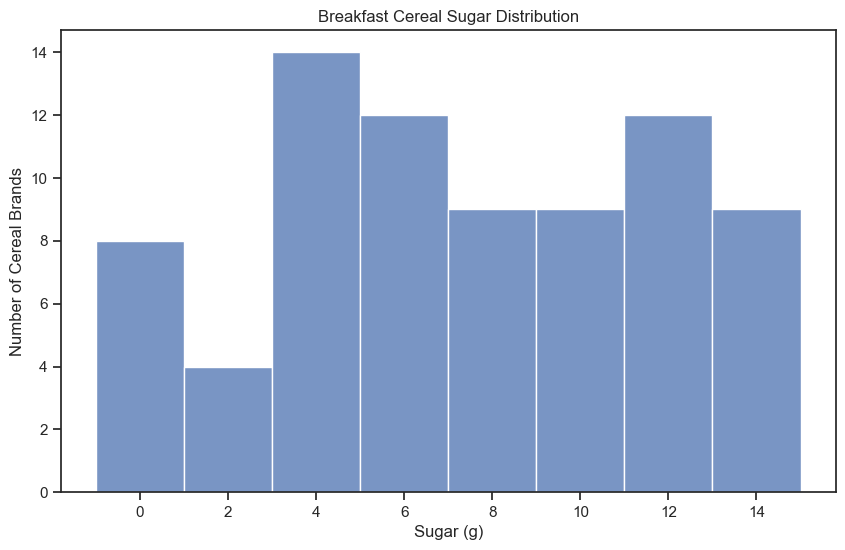

In [11]:
# A histogram plot of the sugar content in all cereals.
plt.figure(figsize=(10,6))

histplot = sns.histplot(data=cereal_data, x='sugars')
histplot.set_title("Breakfast Cereal Sugar Distribution")
histplot.set_ylabel("Number of Cereal Brands")
histplot.set_xlabel("Sugar (g)")

plt.show()

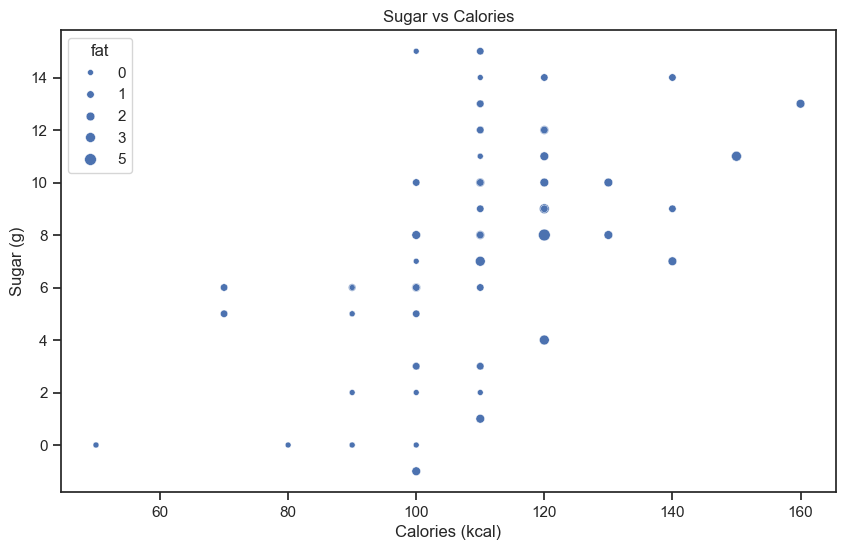

In [12]:
# A scatter plot showing the relationship between sugar and calories.
plt.figure(figsize=(10,6))

scatter = sns.scatterplot(data=cereal_data, x='calories', y='sugars', size='fat')
scatter.set_title("Sugar vs Calories")
scatter.set_ylabel("Sugar (g)")
scatter.set_xlabel("Calories (kcal)")

plt.show()

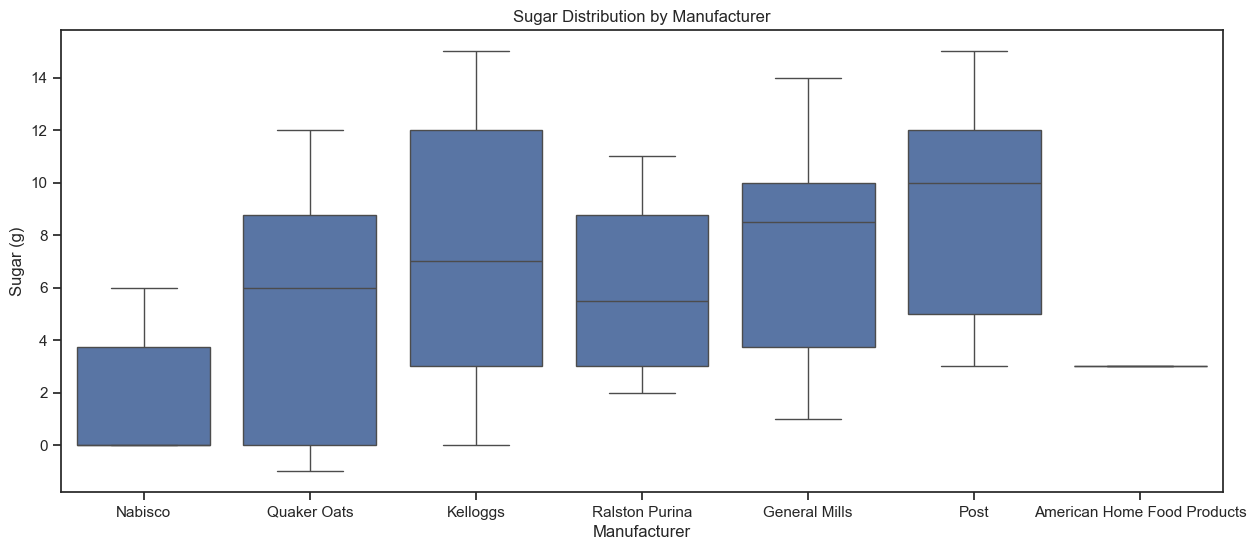

In [13]:
# A box plot showing the distribution of sugar content by manufacturer.
plt.figure(figsize=(15,6))

boxplot = sns.boxplot(data=cereal_data, x='mfr_name', y='sugars')
boxplot.set_title("Sugar Distribution by Manufacturer")
boxplot.set_ylabel("Sugar (g)")
boxplot.set_xlabel("Manufacturer")

plt.show()

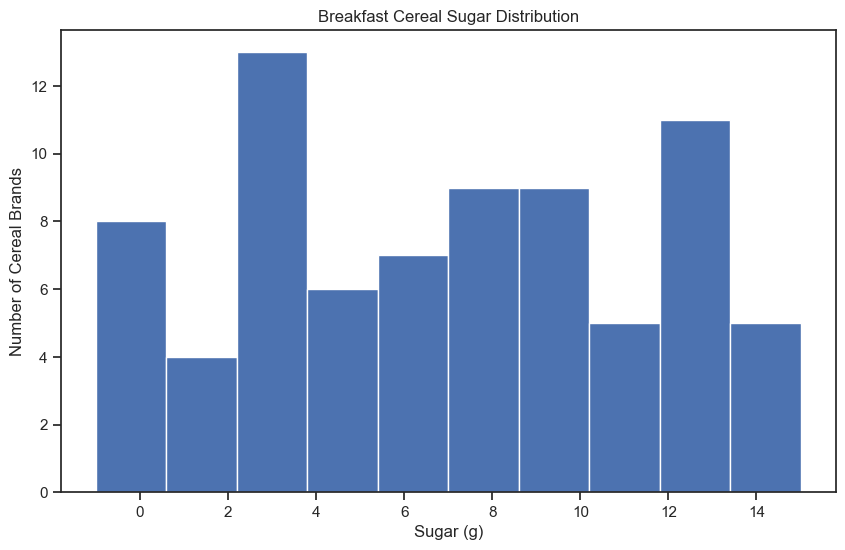

In [14]:
# A histogram plot of the sugar content in all cereals.
plt.figure(figsize=(10,6))

pd_hist = cereal_data['sugars'].plot.hist()
pd_hist.set_title("Breakfast Cereal Sugar Distribution")
pd_hist.set_ylabel("Number of Cereal Brands")
pd_hist.set_xlabel("Sugar (g)")

plt.show()

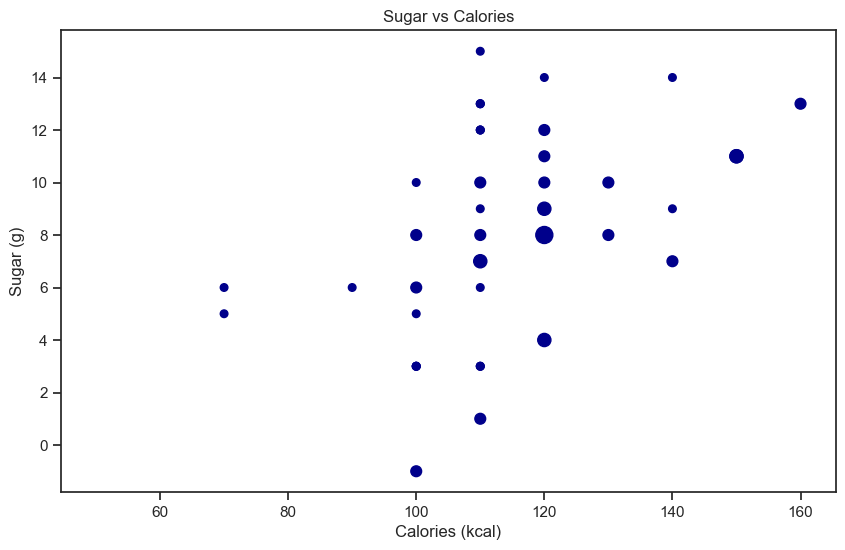

In [15]:
# A scatter plot showing the relationship between sugar and calories.

# Scale this number so we can use it for our dot size
cereal_data['scaled_fat'] = cereal_data['fat'] * 30

pd_scatter = cereal_data.plot.scatter(x='calories', y='sugars', s='scaled_fat', c='DarkBlue', figsize=(10, 6))
pd_scatter.set_title("Sugar vs Calories")
pd_scatter.set_ylabel("Sugar (g)")
pd_scatter.set_xlabel("Calories (kcal)")


plt.show()

<Figure size 1500x600 with 0 Axes>

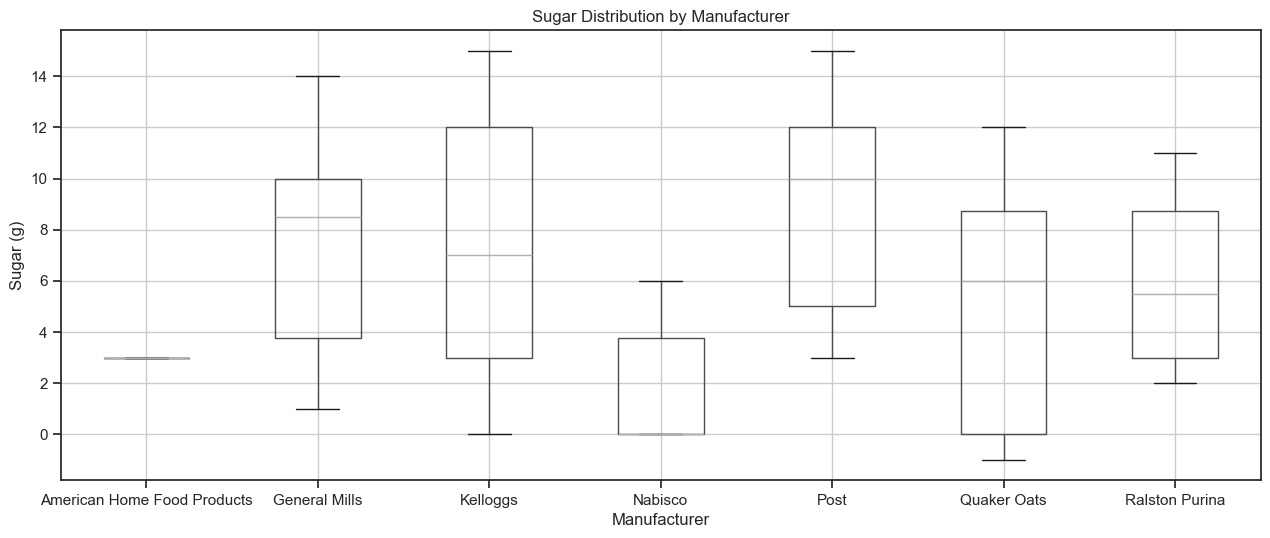

In [16]:
# A box plot showing the distribution of sugar content by manufacturer.

# Pandas boxplots are ugly I advise avoiding them
plt.figure(figsize=(15,6))

pd_boxplot = cereal_data.boxplot(by='mfr_name', column=['sugars'], figsize=(15,6))
pd_boxplot.set_title("Sugar Distribution by Manufacturer")

# Pandas adds its own subtitle by default, so let's hide it
plt.suptitle("")
pd_boxplot.set_ylabel("Sugar (g)")
pd_boxplot.set_xlabel("Manufacturer")

plt.show()

In [17]:
# First, add a new column containing the Weight Watchers point calculations
cereal_data['ww_points'] = (cereal_data['calories'] * 0.0305) + (cereal_data['fat'] * 0.275) + (cereal_data['sugars'] * 0.12) - (cereal_data['protein'] * 0.098)

# Round the point values and store them as ints
cereal_data['ww_points'] = cereal_data['ww_points'].round().astype(int)

# Then, filter the dataset to include on cereals manufactured by Kelloggs
kelloggs = cereal_data[ cereal_data['mfr'] == 'K' ]
# Could also do:
# kelloggs = cereal[ cereal['mfr_name'] == 'Kelloggs' ]

# Finally, calculate summary statistics for the new column
kelloggs['ww_points'].describe()

count    23.000000
mean      4.217391
std       1.241572
min       1.000000
25%       3.000000
50%       5.000000
75%       5.000000
max       7.000000
Name: ww_points, dtype: float64

# Part 5: Dietary Calculations

The marketing team has been able to arrange a partnership between the popular Weight Watchers diet brand and Kelloggs cereal.

The Weight Watchers system assigns a point value to each food, and participants in the program are allotted a certain number of points each day.

One recent formula for calculating points is:

    (Calories * .0305) + (Fat * .275) + (Sugar * .12) - (Protein * .098)

With the final answer being rounded to the nearest integer.

First, [add a new column](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html) with the Weight Watchers point calculation derived from the existing data.

**Be sure to round the number to the nearest int and store the data as an int, not as a float with 0 decimals.**

Then, [select a subset of the data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#how-do-i-filter-specific-rows-from-a-dataframe) containing just cereals manufactured by Kelloggs.

Finally, calculate the same summary statistics for the points calculations as earlier (mean, median, standard deviation, min, and max).

## 🌟 Above and Beyond 🌟

The marketing team is pleased with what you've accomplished so far. They have a meeting with top cereal executives in the morning, and they'd like you to do as many of the following additional tasks as you have time for:

1. Weight Watchers used to have an older points system that used this formula: `(calories / 50) + (fat / 12) - (fiber / 5)`, but only the first 4 grams of fiber were included in the calculation. For comparison's sake, create an additional column with the calculation for the old points system.

2. Marketing really likes the boxplot of the sugar content for each cereal, they'd like similar plots for calories and fat, but using different color schemes for each chart.